# Leer los datos.

In [16]:
import pandas as pd
import numpy as np

# Cargar los datos desde el archivo CSV
df = pd.read_csv('../data/ofertas_relampago.csv')

# Asegurar que la columna OFFER_START_DATE sea interpretada como una fecha (solo formato de fecha)
df['OFFER_START_DATE'] = pd.to_datetime(df['OFFER_START_DATE'], format='%Y-%m-%d')

# Asegurar que las columnas OFFER_START_DTTM y OFFER_FINISH_DTTM sean interpretadas como fechas con horas
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'], format='%Y-%m-%d %H:%M:%S%z')
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'], format='%Y-%m-%d %H:%M:%S%z')

# Mostrar los tipos de datos para confirmar que las conversiones fueron exitosas
print(df.dtypes)

# Mostrar las primeras 3 filas del DataFrame como una vista previa
df.head(3)

OFFER_START_DATE                  datetime64[ns]
OFFER_START_DTTM             datetime64[ns, UTC]
OFFER_FINISH_DTTM            datetime64[ns, UTC]
OFFER_TYPE                                object
INVOLVED_STOCK                             int64
REMAINING_STOCK_AFTER_END                  int64
SOLD_AMOUNT                              float64
SOLD_QUANTITY                            float64
ORIGIN                                    object
SHIPPING_PAYMENT_TYPE                     object
DOM_DOMAIN_AGG1                           object
VERTICAL                                  object
DOMAIN_ID                                 object
dtype: object


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS


# Exploración de calida de datos.

In [17]:
# Resumen de datos faltantes
missing_data = df.isnull().sum()

# Total de registros
total_rows = len(df)

# Crear un resumen de valores faltantes con el porcentaje
# Incluye el nombre de la columna, número y porcentaje de valores faltantes, y tipo de dato
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_data,
    'Missing_Percentage': (missing_data / total_rows) * 100,
    'Data_Type': df.dtypes
}).reset_index(drop=True)

# Separar el análisis por tipo de variable
# Identificar columnas numéricas, categóricas y de tipo datetime
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns
datetime_columns = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns

# Resumen por tipo de variable
# Agregar un tipo lógico basado en el tipo de dato de cada columna
missing_summary['Variable_Type'] = missing_summary['Column'].apply(
    lambda x: (
        'Numerical' if x in numerical_columns else
        'Categorical' if x in categorical_columns else
        'Datetime' if x in datetime_columns else
        'Other'
    )
)

# Mostrar información clave sobre el DataFrame
print("Dimension de datos:")
print(df.shape)
print('--------')
# Mostrar valores únicos en la columna 'ORIGIN'
print("Valores distintos en variable 'ORIGIN':")
print(df["ORIGIN"].value_counts())
print('--------')
# Mostrar el resumen de valores faltantes y tipos de variables
print("Resumen de Valores Faltantes y Tipos de Variables:")
missing_summary

Dimension de datos:
(48746, 13)
--------
Valores distintos en variable 'ORIGIN':
ORIGIN
A    11316
Name: count, dtype: int64
--------
Resumen de Valores Faltantes y Tipos de Variables:


,Column,Missing_Count,Missing_Percentage,Data_Type,Variable_Type
0,OFFER_START_DATE,0,0.000000,datetime64[ns],Datetime
1,OFFER_START_DTTM,0,0.000000,"datetime64[ns, UTC]",Datetime
2,OFFER_FINISH_DTTM,0,0.000000,"datetime64[ns, UTC]",Datetime
3,OFFER_TYPE,0,0.000000,object,Categorical
4,INVOLVED_STOCK,0,0.000000,int64,Numerical
5,REMAINING_STOCK_AFTER_END,0,0.000000,int64,Numerical
6,SOLD_AMOUNT,24167,49.577401,float64,Numerical
7,SOLD_QUANTITY,24167,49.577401,float64,Numerical
8,ORIGIN,37430,76.785788,object,Categorical
9,SHIPPING_PAYMENT_TYPE,0,0.000000,object,Categorical


Se decide eliminar la variable 'ORIGIN' dado que el 76% de sus valores son nulos, y el restante 'A', dado que no agrega mayor información.

Resumen estadístico de variables con alto % de faltantes:
        SOLD_AMOUNT  SOLD_QUANTITY
count  24579.000000   24579.000000
mean      51.208898      10.851052
std      175.254414      45.475305
min        0.280000       1.000000
25%        5.730000       1.000000
50%       12.420000       3.000000
75%       30.925000       6.000000
max     4836.570000    1646.000000

Distribución de valores no nulos por columna:
SOLD_AMOUNT - 24579 valores no nulos
SOLD_QUANTITY - 24579 valores no nulos


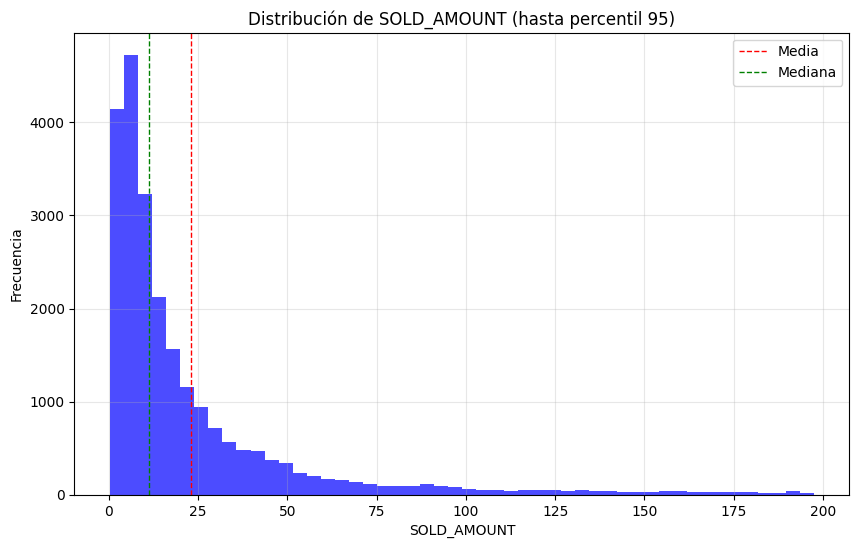

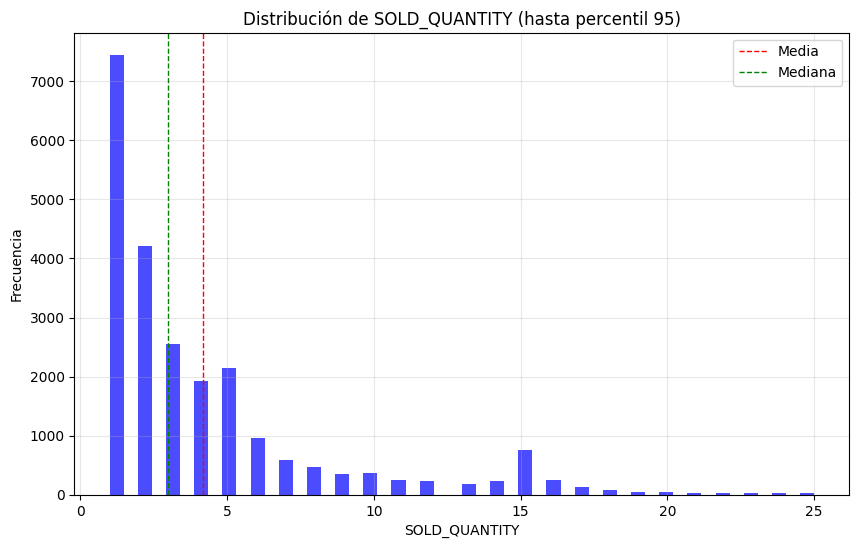

In [18]:
# Eliminar la variable 'ORIGIN'
df.drop(columns=['ORIGIN'], inplace=True)

# Explorar las variables con alto % de faltantes
high_missing_columns = ['SOLD_AMOUNT', 'SOLD_QUANTITY']

# Resumen estadístico para estas variables
print("Resumen estadístico de variables con alto % de faltantes:")
print(df[high_missing_columns].describe())

# Distribución de valores no nulos
print("\nDistribución de valores no nulos por columna:")
for col in high_missing_columns:
    print(f"{col} - {df[col].notnull().sum()} valores no nulos")

# Visualizar distribuciones de las columnas con alto % de faltantes
import matplotlib.pyplot as plt

for col in high_missing_columns:
    # Crear el histograma
    plt.figure(figsize=(10, 6))
    
    # Obtener el percentil 95 para limitar el eje x
    p95 = df[col].quantile(0.95)
    
    # Crear histograma solo con datos hasta el percentil 95
    plt.hist(df[col][df[col] <= p95], bins=50, color='blue', alpha=0.7)
    
    plt.title(f'Distribución de {col} (hasta percentil 95)', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    
    # Añadir líneas verticales para la media y mediana
    plt.axvline(df[col][df[col] <= p95].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
    plt.axvline(df[col][df[col] <= p95].median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')
    
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [20]:
# Identificar valores nulos en ambas columnas
missing_sold_amount = df['SOLD_AMOUNT'].isnull()
missing_sold_quantity = df['SOLD_QUANTITY'].isnull()

# Valores faltantes compartidos
shared_missing = (missing_sold_amount & missing_sold_quantity).sum()

# Valores faltantes exclusivos de cada columna
missing_only_sold_amount = (missing_sold_amount & ~missing_sold_quantity).sum()
missing_only_sold_quantity = (~missing_sold_amount & missing_sold_quantity).sum()

# Mostrar resultados
print("Valores faltantes compartidos entre SOLD_AMOUNT y SOLD_QUANTITY:", shared_missing)
print("Valores faltantes solo en SOLD_AMOUNT:", missing_only_sold_amount)
print("Valores faltantes solo en SOLD_QUANTITY:", missing_only_sold_quantity)

# Filtrar filas donde ambas columnas tienen valores faltantes
shared_missing_rows = df[missing_sold_amount & missing_sold_quantity]

# Mostrar las primeras 5 filas de las que comparten valores faltantes
print("Top 5 filas con valores faltantes compartidos entre SOLD_AMOUNT y SOLD_QUANTITY:")
shared_missing_rows.head(5)

Valores faltantes compartidos entre SOLD_AMOUNT y SOLD_QUANTITY: 24167
Valores faltantes solo en SOLD_AMOUNT: 0
Valores faltantes solo en SOLD_QUANTITY: 0
Top 5 filas con valores faltantes compartidos entre SOLD_AMOUNT y SOLD_QUANTITY:


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
11,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:04+00:00,lightning_deal,15,15,NaN,NaN,none,ELECTRONICS,CE,MLM-ELECTRONIC_PRODUCTS


Se asumirá que los valores faltantes en `SOLD_AMOUNT` y `SOLD_QUANTITY` serán imputados como ceros. Esto se justifica porque no existen valores mínimos registrados que indiquen esta condición y, al imputar con otra medida de tendencia central, se podría introducir ruido en el análisis.

In [23]:
# Imputar valores faltantes con ceros en SOLD_AMOUNT y SOLD_QUANTITY
df['SOLD_AMOUNT'] = df['SOLD_AMOUNT'].fillna(0)
df['SOLD_QUANTITY'] = df['SOLD_QUANTITY'].fillna(0)

print("Valores faltantes imputados con ceros en SOLD_AMOUNT y SOLD_QUANTITY.")

Valores faltantes imputados con ceros en SOLD_AMOUNT y SOLD_QUANTITY.


In [25]:
# Separar columnas por tipo de dato
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns
datetime_columns = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns

# Resumen para columnas numéricas
numerical_summary = df[numerical_columns].agg(['mean', 'median', 'std', 'min', 'max'])

# Resumen para columnas categóricas
categorical_summary = df[categorical_columns].nunique().to_frame(name='Unique_Count')

# Resumen para columnas de fecha
datetime_summary = pd.DataFrame({
    'Min_Date': df[datetime_columns].min(),
    'Max_Date': df[datetime_columns].max()
})

# Mostrar los resúmenes
print("Resumen de columnas numéricas:")
print(numerical_summary)

print("\nResumen de columnas categóricas:")
print(categorical_summary)

print("\nResumen de columnas de fecha:")
print(datetime_summary)

# Eliminar la variable 'OFFER_TYPE'
df.drop(columns=['OFFER_TYPE'], inplace=True)

Resumen de columnas numéricas:
        INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  SOLD_AMOUNT  SOLD_QUANTITY
mean         35.007508                  30.565216    25.820857       5.471382
median       10.000000                   8.000000     1.000000       1.000000
std         206.761058                 195.813806   127.051542      32.743776
min           1.000000                -192.000000     0.000000       0.000000
max        9000.000000                8635.000000  4836.570000    1646.000000

Resumen de columnas categóricas:
                       Unique_Count
OFFER_TYPE                        1
SHIPPING_PAYMENT_TYPE             2
DOM_DOMAIN_AGG1                  36
VERTICAL                          9
DOMAIN_ID                      1266

Resumen de columnas de fecha:
                                    Min_Date                   Max_Date
OFFER_START_DATE         2021-06-01 00:00:00        2021-07-31 00:00:00
OFFER_START_DTTM   2021-06-01 07:00:00+00:00  2021-07-31 19:00:00+00:00
OFFE

### Observaciones Clave

1. **Columnas Numéricas:**
   - `SOLD_AMOUNT` y `SOLD_QUANTITY` tienen valores muy concentrados en los percentiles bajos (mediana de 1.0), pero con máximos extremadamente altos (4836.57 y 1646.0), lo que sugiere posibles valores atípicos.
   - `REMAINING_STOCK_AFTER_END` incluye valores negativos (mínimo de -192), que podrían indicar devoluciones o errores en el registro.

2. **Columnas Categóricas:**
   - `OFFER_TYPE` no aporta variabilidad (1 único valor) y será eliminada.
   - `DOMAIN_ID` tiene alta granularidad con 1266 valores únicos, lo que podría ser útil para segmentación.

3. **Columnas de Fecha:**
   - Los datos cubren un rango temporal del 1 de junio al 1 de agosto de 2021, lo cual incluye 2 meses completos de ofertas.

Estas observaciones guían las decisiones de limpieza y exploración adicionales.

# Exploración de variables numericas.